In [1]:
import statsmodels.api as sm
import pandas
from patsy import dmatrices

In [2]:
df = sm.datasets.get_rdataset("Guerry", "HistData").data

In [3]:
vars = ['Department', 'Lottery', 'Literacy', 'Wealth', 'Region']

df = df[vars]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Department  86 non-null     object
 1   Lottery     86 non-null     int64 
 2   Literacy    86 non-null     int64 
 3   Wealth      86 non-null     int64 
 4   Region      85 non-null     object
dtypes: int64(3), object(2)
memory usage: 3.5+ KB


In [4]:
df.head()

,Department,Lottery,Literacy,Wealth,Region
0,Ain,41,37,73,E
1,Aisne,38,51,22,N
2,Allier,66,13,61,C
3,Basses-Alpes,80,46,76,E
4,Hautes-Alpes,79,69,83,E


In [5]:
df = df.dropna()
df[-5:]

,Department,Lottery,Literacy,Wealth,Region
80,Vendee,68,28,56,W
81,Vienne,40,25,68,W
82,Haute-Vienne,55,13,67,C
83,Vosges,14,62,82,E
84,Yonne,51,47,30,C


## Create Design Matrices

In [6]:
y, X = dmatrices('Lottery ~ Literacy + Wealth + Region', data=df, return_type='dataframe')

In [7]:
y[:3]

,Lottery
0,41.0
1,38.0
2,66.0


In [8]:
X[:3]

,Intercept,Region[T.E],Region[T.N],Region[T.S],Region[T.W],Literacy,Wealth
0,1.0,1.0,0.0,0.0,0.0,37.0,73.0
1,1.0,0.0,1.0,0.0,0.0,51.0,22.0
2,1.0,0.0,0.0,0.0,0.0,13.0,61.0


## Model Fitting

In [9]:
mod = sm.OLS(y, X)    # Describe model
res = mod.fit()       # Fit model
print(res.summary())   # Summarize model

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.636
Date:                Tue, 04 Aug 2020   Prob (F-statistic):           1.07e-05
Time:                        16:10:36   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             764.6
Df Residuals:                      78   BIC:                             781.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      38.6517      9.456      4.087      

In [10]:
res.params

Intercept      38.651655
Region[T.E]   -15.427785
Region[T.N]   -10.016961
Region[T.S]    -4.548257
Region[T.W]   -10.091276
Literacy       -0.185819
Wealth          0.451475
dtype: float64

In [11]:
res.rsquared

0.3379508691928822

In [12]:
sm.stats.linear_rainbow(res)

(0.847233997615691, 0.6997965543621644)

In [14]:
print(sm.stats.linear_rainbow.__doc__)


    Rainbow test for linearity

    The null hypothesis is the fit of the model using full sample is the same
    as using a central subset. The alternative is that the fits are difference.
    The rainbow test has power against many different forms of nonlinearity.

    Parameters
    ----------
    res : RegressionResults
        A results instance from a linear regression.
    frac : float, default 0.5
        The fraction of the data to include in the center model.
    order_by : {ndarray, str, List[str]}, default None
        If an ndarray, the values in the array are used to sort the
        observations. If a string or a list of strings, these are interpreted
        as column name(s) which are then used to lexicographically sort the
        data.
    use_distance : bool, default False
        Flag indicating whether data should be ordered by the Mahalanobis
        distance to the center.
    center : {float, int}, default None
        If a float, the value must be in [0, 1] a

Figure(432x288)


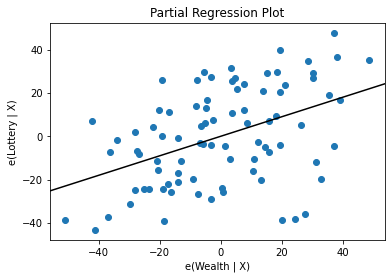

In [16]:
print(sm.graphics.plot_partregress('Lottery', 'Wealth', ['Region', 'Literacy'], data=df, obs_labels=False))

# Gamma model example

In [18]:
import statsmodels.api as sm
data = sm.datasets.scotland.load(as_pandas=False)
data.exog = sm.add_constant(data.exog)

In [28]:
data.endog

array([60.3, 52.3, 53.4, 57. , 68.7, 48.8, 65.5, 70.5, 59.1, 62.7, 51.6,
       62. , 68.4, 69.2, 64.7, 75. , 62.1, 67.2, 67.7, 52.7, 65.7, 72.2,
       47.4, 51.3, 63.6, 50.7, 51.6, 56.2, 67.6, 58.9, 74.7, 67.3])

In [29]:
data.exog

array([[1.00000e+00, 7.12000e+02, 2.10000e+01, 1.05000e+02, 8.24000e+01,
        1.35660e+04, 1.23000e+01, 1.49520e+04],
       [1.00000e+00, 6.43000e+02, 2.65000e+01, 9.70000e+01, 8.02000e+01,
        1.35660e+04, 1.53000e+01, 1.70395e+04],
       [1.00000e+00, 6.79000e+02, 2.83000e+01, 1.13000e+02, 8.63000e+01,
        9.61100e+03, 1.39000e+01, 1.92157e+04],
       [1.00000e+00, 8.01000e+02, 2.71000e+01, 1.09000e+02, 8.04000e+01,
        9.48300e+03, 1.36000e+01, 2.17071e+04],
       [1.00000e+00, 7.53000e+02, 2.20000e+01, 1.15000e+02, 6.47000e+01,
        9.26500e+03, 1.46000e+01, 1.65660e+04],
       [1.00000e+00, 7.14000e+02, 2.43000e+01, 1.07000e+02, 7.90000e+01,
        9.55500e+03, 1.38000e+01, 1.73502e+04],
       [1.00000e+00, 9.20000e+02, 2.12000e+01, 1.18000e+02, 7.22000e+01,
        9.61100e+03, 1.33000e+01, 1.95040e+04],
       [1.00000e+00, 7.79000e+02, 2.05000e+01, 1.14000e+02, 7.52000e+01,
        9.48300e+03, 1.45000e+01, 1.59695e+04],
       [1.00000e+00, 7.71000e+02

In [19]:
gamma_model = sm.GLM(data.endog, data.exog, family=sm.families.Gamma())

c:\users\norbert\appdata\local\programs\python\python36\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:278: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  DomainWarning)


In [20]:
gamma_results = gamma_model.fit()

In [21]:
gamma_results.params

array([-1.77652703e-02,  4.96176830e-05,  2.03442259e-03, -7.18142874e-05,
        1.11852013e-04, -1.46751504e-07, -5.18683112e-04, -2.42717498e-06])

In [ ]:
print(gamma_results.scale)
print(gamma_results.deviance)
print(gamma_results.pearson_chi2)
print(gamma_results.llf)

In [30]:
import numpy as np
from statsmodels.multivariate.pca import PCA
x = np.random.randn(100)[:, None]
x = x + np.random.randn(100, 100)
pc = PCA(x, method='eig')

In [31]:
pc

Principal Component Analysis(nobs: 100, nvar: 100, transformation: Standardize (Correlation), normalization: True, number of components: 100, method: Eigenvalue, id: 0x230776c7898)